In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6,6)

In [71]:
from ocr import CharacterLoader, ImagePreprocesor, OCR
from utils import display

In [72]:
IMG_FILENAME = 'imgs/lorem2.jpg'
FONT_FILENAME = 'fonts/times.ttf'
CHARS = 'abcdefghijklmnopqrstuwvxyz01234567890'

### Preprocessing zdjęcia

In [73]:
IP = ImagePreprocesor()

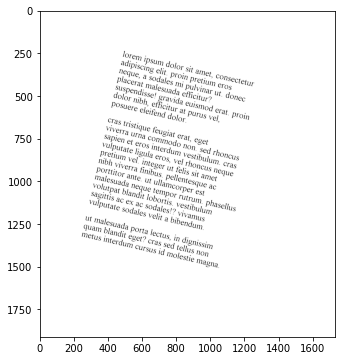

In [74]:
IP.read_file(IMG_FILENAME)
display(IP.get_img())

#### Denoise

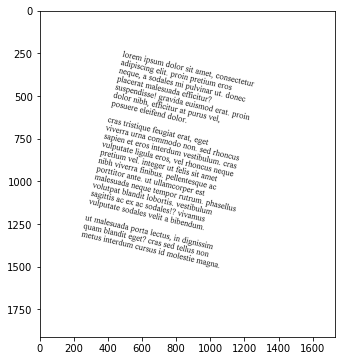

In [75]:
IP.denoise()
display(IP.get_img())

### Rotate and center

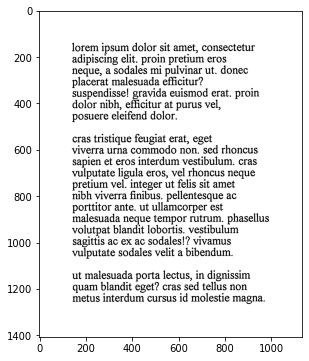

In [76]:
IP.center_text_block()
display(IP.get_img())

#### Invert and normalize

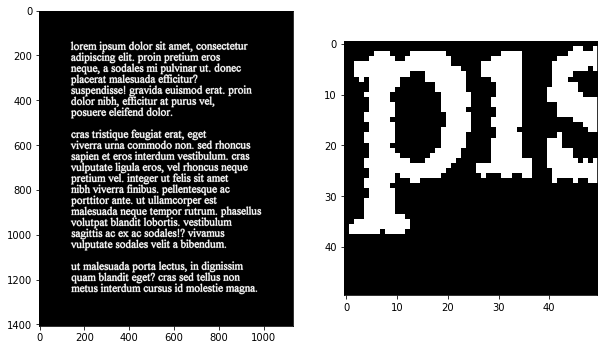

In [77]:
IP.invert().normalize()
display(IP.get_img(), IP.get_img()[200:250, 200:250], figsize=(10,10))

### Morphology

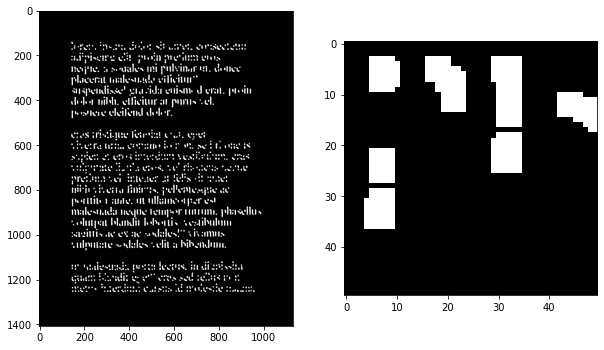

In [78]:
IP.smooth()
display(IP.get_img(), IP.get_img()[200:250, 200:250], figsize=(10,10))

### Detect lines and estimate char size

Estimated font size:  49.0


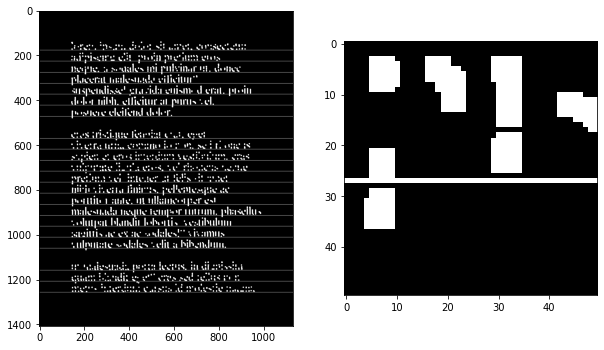

In [79]:
IP.detect_lines()
lines = IP.get_lines()
font_size = IP.get_font_size()

print("Estimated font size: ", font_size)
img_lines = np.copy(IP.get_img())
img_lines[lines, :] = 1
display(img_lines, img_lines[200:250, 200:250], figsize=(10,10))

### Ladowanie zdjęć znaków

In [80]:
CL = CharacterLoader()

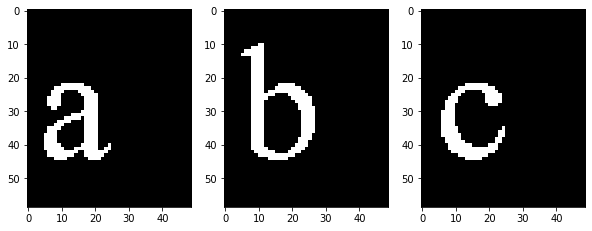

In [81]:
CL.load_chars(FONT_FILENAME, font_size, CHARS)
display(*CL.get_chars_imgs()[:3], figsize=(10,10))

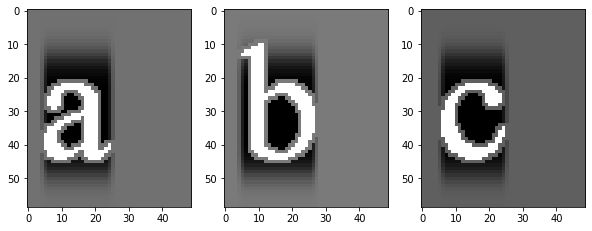

In [82]:
CL.adjust_chars()
display(*CL.get_chars_imgs()[:3], figsize=(10,10))

In [83]:
print(*CL.get_spans()[:3])

(5, 25) (5, 27) (6, 25)


### Detekcja

In [84]:
ocr = OCR(FONT_FILENAME)

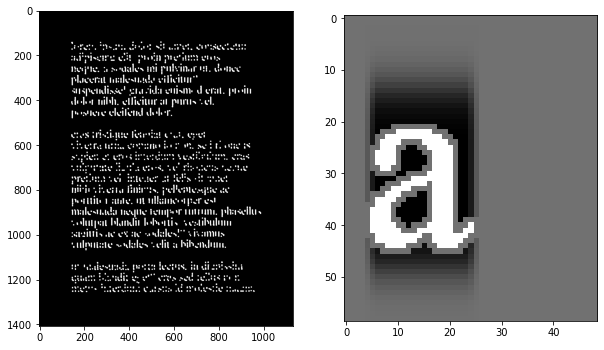

In [85]:
img, lines, font_size = ocr._load_img(IMG_FILENAME)
char_imgs, char_spans = ocr._load_chars(FONT_FILENAME, font_size, CHARS)
display(img, char_imgs[0], figsize=(10,10))

### Korelacje

<AxesSubplot:>

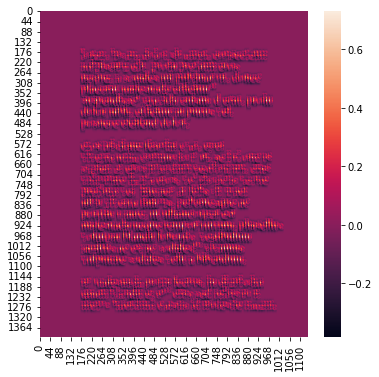

In [86]:
corrs = ocr.get_corrs(img, char_imgs)
sns.heatmap(corrs[0])

### Linearyzacja korelacji

(37, 1407, 1132)


<AxesSubplot:>

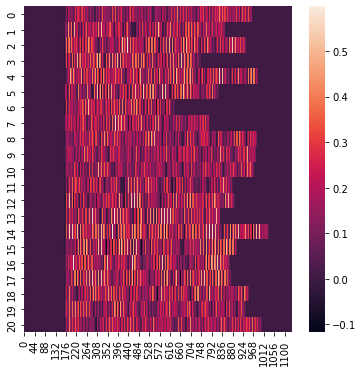

In [87]:
corrs = ocr.linearize_corrs(corrs, lines)
sns.heatmap(corrs[0])

### Wykrywamy spacje

(1, 1407, 1132)


<AxesSubplot:>

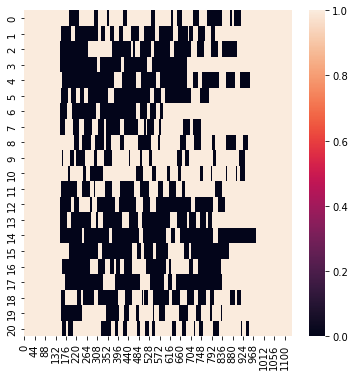

In [88]:
spaces = ocr.detect_spaces(img, font_size, lines)
sns.heatmap(spaces)

Wybieramy literki

(21, 1132)


<AxesSubplot:>

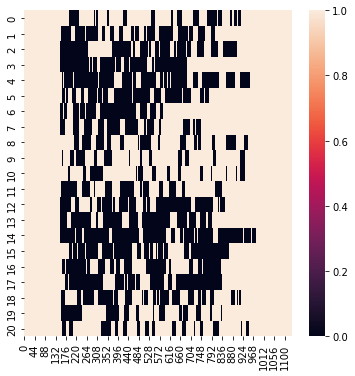

In [89]:
detections = ocr.pick_detections(corrs, char_spans, spaces)
sns.heatmap(detections>0)

Konwertujemy na tekst

In [90]:
text = ocr.get_text(detections)
print(text)

ur i 5 aisc rt
ai 1uisc s l 1 m pi ru 1 w i
rcs1ai iui11 ui iru aiii 3i x ini
qrl1ccra aiai11 5uid iwi1i4iti
3uipwni1iss cr 3i1 csuin 3 lwr j1 4i
3i i i niil c11iaiu u qruri c
1 wuioi jcl4itni w i i
c u c iui 4w si x a
o r1 ii r mi 1 s i in 3
x w o j r
ur w i
pr 3i x 3ir u s 1 l u
n i icri 11ni 1 j1clcui js1s u
1 urtt1 uii u u1luu 4i i r
nii11 5uidl iucqu 3icu i 1uir1un j1hiisc11
4uittu 14lndj i1 ui1 i qt1u1ui
sainit1 a r u x1a1 miu
u1outni x1a1c wl 1ailcni1ui
1 iui juri 1 1 1cc ui 3i c s i
cuii xd r sc o l
r t i i i 1

